### Defining middleware

In ASP.NET Core, ***middleware*** consists of C# `classes` or `functions` that handle
an HTTP `request` or `response`.

Middleware can  
- Handle an incoming HTTP request by `generating an HTTP response`
- Process an `incoming HTTP request`, `modify it`, and `pass` it on to another
piece of middleware
- Process an `outgoing HTTP response`, `modify it`, and `pass` it on to another piece of middleware or to the ASP.NET Core web server

***Middleware*** is `chained together`, with the `output of one` **acting** as the `input to the next` to form a pipeline

a `static-file middleware` component might spot an incoming `request for an image` with a specific name, `load the image from disk`, and send it back to the user `without passing it` on.

`EndpointMiddleware` is most important piece of middleware in most ASP.NET Core applications. This class normally generates all your `HTML` and `JSON` responses

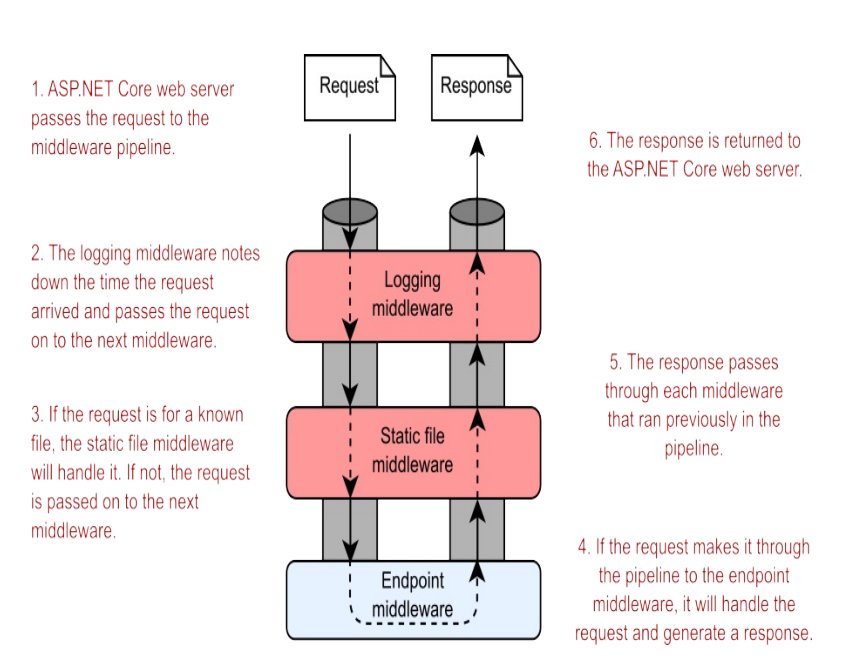

<div dir="rtl" style="margin:auto; width:90%; font-family:vazirmatn; border:1px solid rgb(226, 197, 65); padding: 10px">
<h3 style="text-align:center">
<svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" fill="none" viewBox="0 0 24 24" class="icon-md" style="color: rgb(118, 208, 235);"><path fill="currentColor" fill-rule="evenodd" d="M12.455 4.105a1 1 0 0 0-.91 0L1.987 8.982 1.077 7.2l9.56-4.877a3 3 0 0 1 2.726 0l9.56 4.877A1.98 1.98 0 0 1 24 9.22V15a1 1 0 1 1-2 0v-3.784l-2.033.995v4.094a3 3 0 0 1-1.578 2.642l-4.967 2.673a3 3 0 0 1-2.844 0l-4.967-2.673a3 3 0 0 1-1.578-2.642v-4.094l-2.927-1.433C-.374 10.053-.39 7.949 1.077 7.2l.91 1.782 9.573 4.689a1 1 0 0 0 .88 0L22 8.989v-.014zM6.033 13.19v3.114a1 1 0 0 0 .526.88l4.967 2.674a1 1 0 0 0 .948 0l4.967-2.673a1 1 0 0 0 .526-.88V13.19l-4.647 2.276a3 3 0 0 1-2.64 0z" clip-rule="evenodd"></path></svg>
cross-cutting concerns</h3>
<p>در توسعه نرم‌افزار، منظور از "cross-cutting concerns" (مسائل برش عرضی) آن دسته از قابلیت‌ها یا وظایف است که به صورت افقی در بخش‌های مختلف یک سیستم نرم‌افزاری گسترده شده‌اند و بر بسیاری از اجزای نرم‌افزار تأثیر می‌گذارند. این مسائل به طور معمول به صورت متمرکز در یک مکان خاص پیاده‌سازی نمی‌شوند بلکه در بخش‌های مختلف سیستم وجود دارند.</p>
<p>چند نمونه از مسائل برش عرضی عبارتند از:</p>
<ol><li><strong>Logging (ثبت وقایع)</strong>: ثبت و نگهداری لاگ‌ها در نقاط مختلف سیستم جهت بررسی و دیباگینگ.</li><li><strong>Security (امنیت)</strong>: مسائل مربوط به امنیت مانند احراز هویت و مجوز دسترسی که در بخش‌های مختلف سیستم باید پیاده‌سازی شود.</li><li><strong>Transaction Management (مدیریت تراکنش‌ها)</strong>: مدیریت تراکنش‌ها در بخش‌های مختلف نرم‌افزار به منظور اطمینان از یکپارچگی داده‌ها.</li><li><strong>Error Handling (مدیریت خطا)</strong>: مدیریت خطاها و استثناها که باید در سراسر سیستم به صورت یکپارچه انجام شود.</li><li><strong>Performance Monitoring (نظارت بر عملکرد)</strong>: جمع‌آوری و تحلیل داده‌های عملکردی برای بهبود کارایی سیستم.</li></ol>
<p>برای مدیریت بهتر این مسائل، تکنیک‌ها و الگوهایی مانند برنامه‌نویسی جنبه‌گرا (AOP: Aspect-Oriented Programming) پیشنهاد شده‌اند که به کمک آن‌ها می‌توان کدهای مربوط به مسائل برش عرضی را از کدهای اصلی برنامه جدا کرد و به صورت ماژولار و متمرکز پیاده‌سازی نمود. این امر باعث کاهش پیچیدگی و افزایش قابلیت نگهداری و خوانایی کد می‌شود.</p>
</div>

One of the `most common use cases` for **middleware** is for the `cross-cutting concerns` of your application. These aspects of your application need to occur for every request, regardless of the specific path in the request or the resource requested, including  
- Logging each request
- Adding standard security headers to the response
- Associating a request with the relevant user
- Setting the language for the current request

In each of these examples, the ***middleware*** `receives a request`, `modifies it`, and then `passes the request on to the next piece` of middleware in the pipeline.

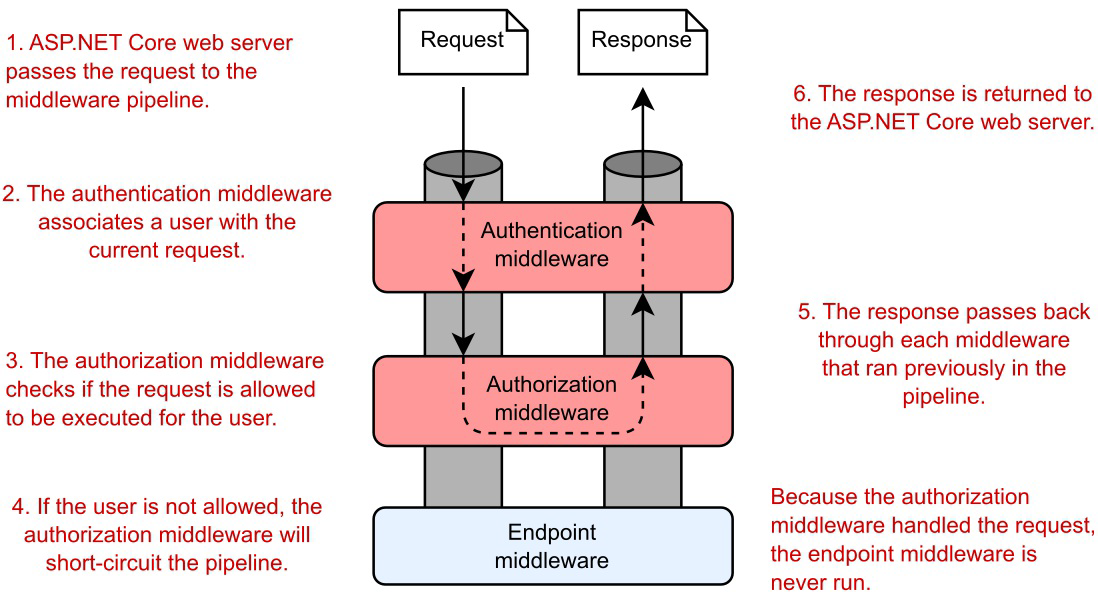

<svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" fill="none" viewBox="0 0 24 24" class="icon-md" style="color: rgb(226, 197, 65);"><path stroke="currentColor" stroke-linecap="round" stroke-linejoin="round" stroke-width="2" d="M15 19a3 3 0 1 1-6 0M15.865 16A7.54 7.54 0 0 0 19.5 9.538C19.5 5.375 16.142 2 12 2S4.5 5.375 4.5 9.538A7.54 7.54 0 0 0 8.135 16m7.73 0h-7.73m7.73 0v3h-7.73v-3"></path></svg> 
When a middleware component `short-circuits` the **pipeline** and ***returns a response*** , it’s called `terminal middleware`.

<div dir="rtl" style="margin:auto; width:90%; font-family:vazirmatn; border:1px solid rgb(226, 197, 65); padding: 10px">
<h3 style="text-align:center">
<svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" fill="none" viewBox="0 0 24 24" class="icon-md" style="color: rgb(118, 208, 235);"><path fill="currentColor" fill-rule="evenodd" d="M12.455 4.105a1 1 0 0 0-.91 0L1.987 8.982 1.077 7.2l9.56-4.877a3 3 0 0 1 2.726 0l9.56 4.877A1.98 1.98 0 0 1 24 9.22V15a1 1 0 1 1-2 0v-3.784l-2.033.995v4.094a3 3 0 0 1-1.578 2.642l-4.967 2.673a3 3 0 0 1-2.844 0l-4.967-2.673a3 3 0 0 1-1.578-2.642v-4.094l-2.927-1.433C-.374 10.053-.39 7.949 1.077 7.2l.91 1.782 9.573 4.689a1 1 0 0 0 .88 0L22 8.989v-.014zM6.033 13.19v3.114a1 1 0 0 0 .526.88l4.967 2.674a1 1 0 0 0 .948 0l4.967-2.673a1 1 0 0 0 .526-.88V13.19l-4.647 2.276a3 3 0 0 1-2.64 0z" clip-rule="evenodd"></path></svg>
 HttpContext</h3>
 <p>آبجکت HttpContext در ASP.NET Core یکی از مهم‌ترین اجزای فریمورک است که اطلاعات مربوط به یک درخواست HTTP را در خود نگه می‌دارد. HttpContext در هر درخواست HTTP ساخته می‌شود و تا پایان عمر آن درخواست زنده می‌ماند. این آبجکت شامل اطلاعاتی مانند درخواست (Request)، پاسخ (Response)، session، کاربر و موارد دیگر است.</p>
 <h4>کی ساخته می‌شود؟</h4>
 <p>HttpContext در ابتدای هر درخواست HTTP توسط سرور ساخته می‌شود و تا زمان پاسخ‌دهی و اتمام پردازش درخواست زنده می‌ماند. به عبارت دیگر، هر درخواست HTTP یک نمونه‌ی جدید از HttpContext دارد.</p>
 <h4>چه مواردی را در خود نگه می‌دارد؟</h4>
 <h5>1. HttpRequest</h5>
 <p>آبجکت <code>HttpRequest</code> اطلاعات مربوط به درخواست HTTP را در بر دارد. این اطلاعات شامل:</p>
 <ul>
 <li><strong>Headers:</strong> هدرهای HTTP درخواست.</li>
 <li><strong>Query String:</strong> پارامترهای موجود در query string.</li>
 <li><strong>Path:</strong> مسیر درخواست.</li>
 <li><strong>Method:</strong> نوع درخواست HTTP (GET, POST, PUT, DELETE و غیره).</li>
 <li><strong>Body:</strong> بدنه&zwnj;ی درخواست، که می&zwnj;تواند شامل داده&zwnj;هایی باشد که از طریق POST یا PUT ارسال شده است.</li>
 <li><strong>Cookies:</strong> کوکی&zwnj;های ارسال شده توسط کلاینت.</li>
 </ul>
 <h5>2. HttpResponse</h5>
 <p>آبجکت <code>HttpResponse</code> اطلاعات مربوط به پاسخ HTTP را نگه می&zwnj;دارد. این اطلاعات شامل:</p>
 <ul>
 <li><strong>Headers:</strong> هدرهای HTTP پاسخ.</li>
 <li><strong>Status Code:</strong> کد وضعیت HTTP (مانند 200، 404، 500 و غیره).</li>
 <li><strong>Body:</strong> بدنه&zwnj;ی پاسخ که به کلاینت ارسال می&zwnj;شود.</li>
 <li><strong>Cookies:</strong> کوکی&zwnj;هایی که باید به کلاینت ارسال شوند.</li>
 </ul>
 <h5>3. User</h5>
 <p>آبجکت <code>ClaimsPrincipal</code> مربوط به کاربر فعلی که درخواست را ارسال کرده است. این آبجکت شامل اطلاعات مربوط به احراز هویت و مجوزهای کاربر می&zwnj;شود.</p>
 <h5>4. Session</h5>
 <p>آبجکت <code>ISession</code> برای مدیریت داده&zwnj;های مربوط به session کاربر. این داده&zwnj;ها بین درخواست&zwnj;های مختلف همان کاربر مشترک هستند و می&zwnj;توانند برای نگهداری اطلاعات موقتی استفاده شوند.</p>
 <h5>5. Items</h5>
 <p>یک دیکشنری برای نگهداری داده&zwnj;های موقت که فقط در طول عمر همان درخواست معتبر هستند. این دیکشنری می&zwnj;تواند برای انتقال داده&zwnj;ها بین میدل&zwnj;ورها و کنترلرها استفاده شود.</p>
 <h5>6. TraceIdentifier</h5>
 <p>یک شناسه&zwnj;ی یکتا برای هر درخواست که می&zwnj;تواند برای ردیابی و دیباگ کردن استفاده شود.</p><h4>7. Connection</h4><p>اطلاعات مربوط به اتصال TCP، مانند آدرس IP کلاینت و پورت اتصال.</p>
 <h4>سایر اجزای مهم</h4>
 <h5>1. RequestServices</h5><p>این ویژگی سرویس&zwnj;های DI (Dependency Injection) مرتبط با درخواست فعلی را در دسترس قرار می&zwnj;دهد.</p>
 <h5>2. WebSockets</h5>
 <p>این ویژگی&zwnj;ها برای مدیریت WebSocket&zwnj;ها استفاده می&zwnj;شود، که امکان ارتباط بلادرنگ با کلاینت را فراهم می&zwnj;کنند.</p>
</div>

***Requests*** are `passed` to the ***middleware pipeline*** as `HttpContext objects`.

In [ ]:
var builder = WebApplication.CreateBuilder(args);
var app = builder.Build();

app.Use(async (httpcontext, next) =>
{
    httpcontext.Response.ContentType = "text/html";

    await httpcontext.Response.WriteAsync("I am middlware1, I received the request <hr>");
   
    await next();

    await httpcontext.Response.WriteAsync("<hr>I am middlware1,  I received the respocse ");
});

app.Use(async (httpcontext, next) =>
{
    await httpcontext.Response.WriteAsync("I am middlware2, I received the request <hr>");
    
    await next();

    await httpcontext.Response.WriteAsync("<hr>I am middlware2,  I received the respocse ");
});

app.MapGet("/", () => "Hello World!");

app.Run();

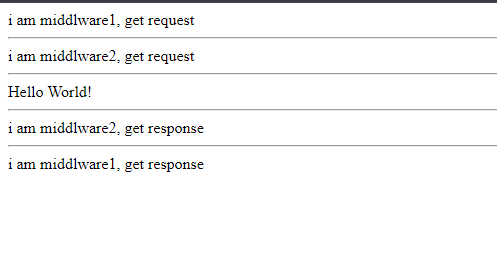

In [ ]:
var builder = WebApplication.CreateBuilder(args);
var app = builder.Build();

app.Use(async (httpcontext, next) =>
{
    httpcontext.Response.ContentType = "text/html";

    await httpcontext.Response.WriteAsync("I am middlware1, I received the request <hr>");

    httpcontext.Items.Add("middlware1Message", "salam middlware 2");

    await next();

    await httpcontext.Response.WriteAsync("<hr>I am middlware1,  I received the respocse ");
});

app.Use(async (httpcontext, next) =>
{
    await httpcontext.Response.WriteAsync("I am middlware2, I received the request <br>");

    await httpcontext.Response.WriteAsync($"middleware1 goft: {httpcontext.Items["middlware1Message"]} <hr>");

    httpcontext.Items.Add("middlware2MessageToEndPoint", "salam endPoint");

    await next();

    await httpcontext.Response.WriteAsync("<hr>I am middlware2,  I received the respocse ");
});

app.MapGet("/", async httpcontext =>
{
    await httpcontext.Response.WriteAsync($"I am EndPoint, middleware2 goft: {httpcontext.Items["middlware2MessageToEndPoint"]}");
});

app.Run();

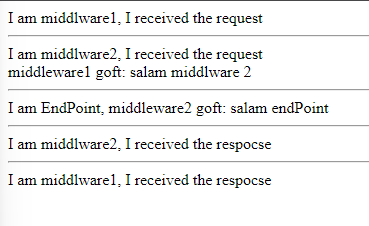

When a `response` has been ***generated***, each middleware component can `inspect` and/or `modify` the **response** as it passes back through the pipeline `before it’s sent to the user`.

### Short Cirbuit Middleware

In [ ]:
var builder = WebApplication.CreateBuilder(args);
var app = builder.Build();

app.Use(async (httpcontext, next) =>
{
    httpcontext.Response.ContentType = "text/html";

    await httpcontext.Response.WriteAsync("I am middlware1, I received the request <hr>");

    httpcontext.Items.Add("middlware1Message", "salam middlware 2");

    if (!httpcontext.Request.Headers.ContainsKey("test")) //short-circuit
    {
        await next();
    }

    await httpcontext.Response.WriteAsync("<hr>I am middlware1,  I received the respocse ");
});

app.Use(async (httpcontext, next) =>
{
    await httpcontext.Response.WriteAsync("I am middlware2, I received the request <br>");

    await httpcontext.Response.WriteAsync($"middleware1 goft: {httpcontext.Items["middlware1Message"]} <hr>");

    httpcontext.Items.Add("middlware2MessageToEndPoint", "salam endPoint");

    await next();

    await httpcontext.Response.WriteAsync("<hr>I am middlware2,  I received the respocse ");
});

app.MapGet("/", async httpcontext =>
{
    await httpcontext.Response.WriteAsync($"I am EndPoint, middleware2 goft: {httpcontext.Items["middlware2MessageToEndPoint"]}");
});

app.Run();

### Create Middleware with classes

- get `RequestDelegate` in ***constructor***
- create `Invoke` **method** that get `HttpContext`

In [ ]:
public class SampleMiddleware
{
    private readonly RequestDelegate _next;

    public FirstMiddleware(RequestDelegate next)
    {
        _next = next;
    }

    public async Task Invoke(HttpContext context)
    {
        //add logic befor to next middleware 

        await _next.Invoke(context);

        // add logic after get respocse and pass response to next prev middleware
    }
}

app.UseMiddleware<SampleMiddleware>();

In [ ]:
//create beautiful extension

public static class SampleMiddlewareExtention
{
    public static IApplicationBuilder UseSample(this IApplicationBuilder app)
    {
        app.UseMiddleware<FirstMiddleware>();
        return app;
    }
}

app.UseSample();

### Terminal Middleware

<div dir="rtl" style="margin:auto; width:90%; font-family:vazirmatn;">
<p>Terminal Middleware در ASP.NET Core به Middleware هایی گفته می‌شود که پردازش درخواست‌ها را متوقف کرده و پاسخی را به کاربر بازمی‌گردانند. به عبارت دیگر، وقتی یک Terminal Middleware درخواست را پردازش کند، دیگر Middleware‌های بعدی در زنجیره پردازش نخواهند شد.</p>
</div>

In [ ]:

var builder = WebApplication.CreateBuilder(args);
var app = builder.Build();

app.Use(async (httpcontext, next) => // normal middlware
{
    httpcontext.Response.ContentType = "text/html";

    await httpcontext.Response.WriteAsync("I am middlware1, I received the request <hr>");

    httpcontext.Items.Add("middlware1Message", "salam middlware 2");

    if (!httpcontext.Request.Headers.ContainsKey("test"))
    {
        await next();
    }

    await httpcontext.Response.WriteAsync("<hr>I am middlware1,  I received the respocse ");
});

app.Run(async context => // terminal middlware
{
    context.Response.ContentType = "text/html";
    await context.Response.WriteAsync("<h1>Hello, World!</h1>");
});

app.MapGet("/", async httpcontext =>
{
    await httpcontext.Response.WriteAsync($"I am EndPoint, middleware2 goft: {httpcontext.Items["middlware2MessageToEndPoint"]}");
});

app.Run();

### Map

<div dir="rtl" style="margin:auto; width:90%; font-family:vazirmatn;">
<p>متد <code>app.Map</code> در ASP.NET Core برای مسیر بندی شرطی (conditional routing) استفاده می‌شود. این متد به شما اجازه می‌دهد تا یک مسیر خاص را به یک مجموعه‌ای از Middlewareها اختصاص دهید. این یعنی شما می‌توانید مجموعه‌ای از Middlewareها را فقط برای مسیرهای خاصی از درخواست‌ها اعمال کنید.</p>
</div>

In [ ]:
var builder = WebApplication.CreateBuilder(args);
var app = builder.Build();


app.Map("/admin", adminApp =>
{
    adminApp.Use(async (httpcontext, next) =>
    {
        httpcontext.Response.ContentType = "text/html";

        await httpcontext.Response.WriteAsync("I am admin middlware1, I received the request <hr>");

        await next();

        await httpcontext.Response.WriteAsync("<hr>I am admin middlware1,  I received the respocse ");
    });
});

app.Map("/api", apiApp =>
{
    apiApp.Use(async (httpcontext, next) =>
    {
        httpcontext.Response.ContentType = "text/html";

        await httpcontext.Response.WriteAsync("I am api middlware1, I received the request <hr>");

        await next();

        await httpcontext.Response.WriteAsync("<hr>I am api middlware1,  I received the respocse ");
    });
});

app.MapGet("/", () => "Hello World!");

app.Run();

In [ ]:
// add general middlware 

var builder = WebApplication.CreateBuilder(args);
var app = builder.Build();

app.Use(async (httpcontext, next) =>
{
    httpcontext.Response.ContentType = "text/html";

    await httpcontext.Response.WriteAsync("I am general middlware, I received the request <hr>");

    await next();

    await httpcontext.Response.WriteAsync("<hr>I am general middlware,  I received the respocse ");
});

app.Map("/admin", adminApp =>
{
    adminApp.Use(async (httpcontext, next) =>
    {
        httpcontext.Response.ContentType = "text/html";

        await httpcontext.Response.WriteAsync("I am admin middlware1, I received the request <hr>");

        await next();

        await httpcontext.Response.WriteAsync("<hr>I am admin middlware1,  I received the respocse ");
    });
});

app.Map("/api", apiApp =>
{
    apiApp.Use(async (httpcontext, next) =>
    {
        httpcontext.Response.ContentType = "text/html";

        await httpcontext.Response.WriteAsync("I am api middlware1, I received the request <hr>");

        await next();

        await httpcontext.Response.WriteAsync("<hr>I am api middlware1,  I received the respocse ");
    });
});

app.MapGet("/", () => "Hello World!");

app.Run();

### WelcomePageMiddleware

`WelcomePageMiddleware` is designed to provide a **sample HTML page** quickly when you’re first developing an application  
  
it’s a single, self-contained middleware component you can use to **ensure** that your `application is running correctly`.

In [ ]:
var builder = WebApplication.CreateBuilder(args);
var app = builder.Build();

app.UseWelcomePage();

app.Run();

`WelcomePageMiddleware` is included as **part of the base ASP.NET Core framework**, so you **don’t need** to add a reference to` any additional NuGet packages`.

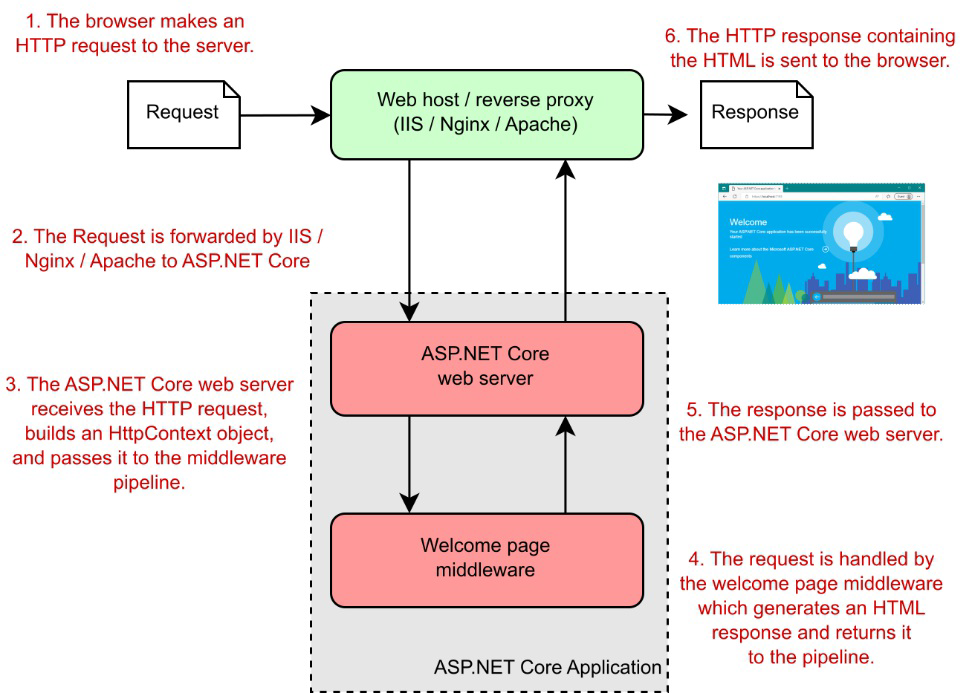

Behind the scenes, `UseWelcomePage` is **extention method** that adds the `WelcomePageMiddleware` to the pipeline by calling   
  
`UseMiddleware<WelcomePageMiddleware>();`

### Handling static files

**By default**, the `wwwroot` folder is the ***only folder*** in your application that ***ASP.NET Core*** will `serve files from`. It ***doesn’t*** serve files from `other folders` for `security reasons`.

You can use `StaticFileMiddleware` to serve static files from the ***wwwroot folder*** when requested

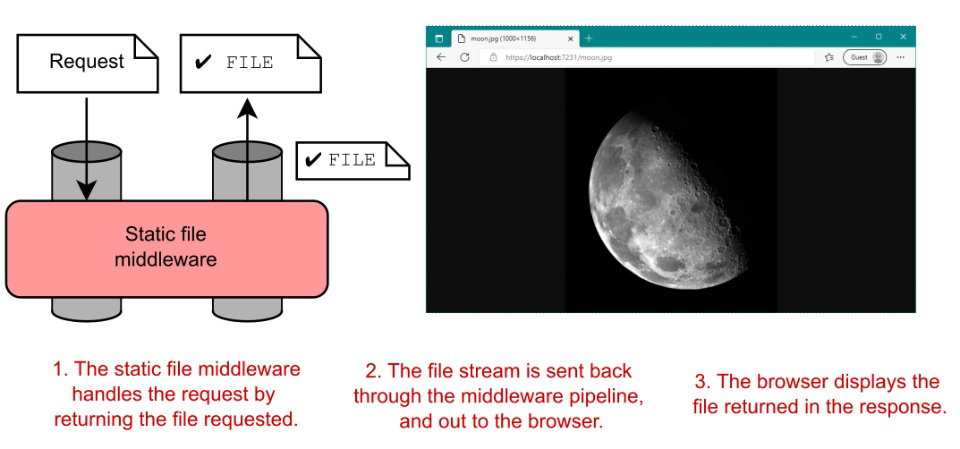

In [ ]:
var builder = WebApplication.CreateBuilder(args);
var app = builder.Build();

app.UseStaticFiles();

app.Run();

If the user ***requests a file*** that `doesn’t exist` in the wwwroot folder, such as
`missing.jpg`, the static-file middleware won’t serve a file. Instead, a `404 HTTP error code` response will be sent to the user’s browser

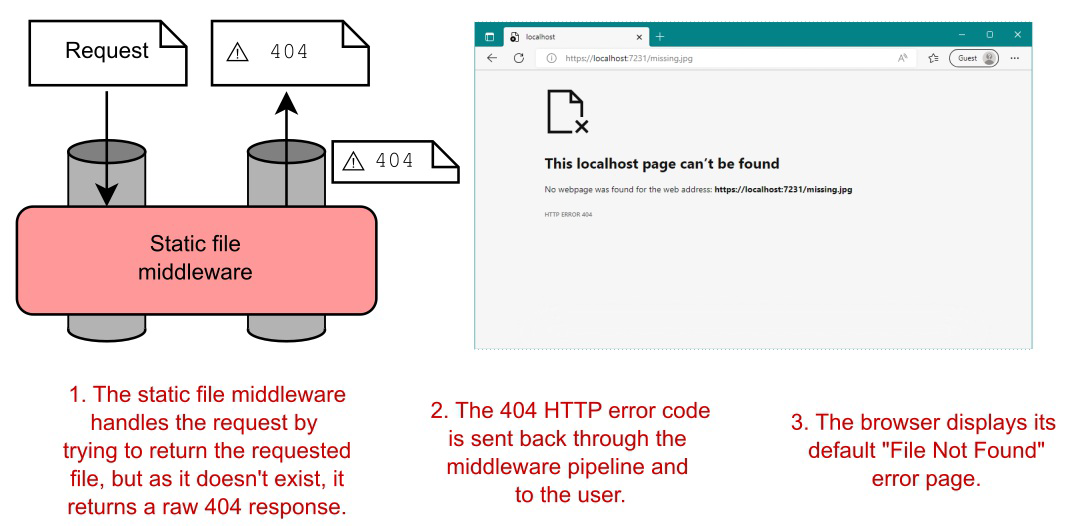

In [ ]:
var builder = WebApplication.CreateBuilder(args);
var app = builder.Build();

app.UseStaticFiles();

app.Use(async (httpcontext, next) =>
{
    httpcontext.Response.ContentType = "text/html";

    await httpcontext.Response.WriteAsync("I am general middlware, I received the request <hr>");

    await next();

    await httpcontext.Response.WriteAsync("<hr>I am general middlware,  I received the respocse ");
});

app.Run();

### A minimal API application

<div dir="rtl" style="margin:auto; width:90%; font-family:vazirmatn;">

<p>ماینیمال API ها در ASP.NET Core یک روش ساده و کارآمد برای ساخت سرویس‌های HTTP است که در نسخه 6.0 از این فریمورک معرفی شده‌اند. این روش به توسعه‌دهندگان امکان می‌دهد تا با استفاده از کد کمتر و پیکربندی ساده‌تر، API‌هایی را پیاده‌سازی کنند. در اینجا به توضیح کلی این روش و نحوه استفاده از آن می‌پردازیم:</p>

<h5>ویژگی‌های کلیدی ماینیمال API ها:</h5>
<ol><li><p><strong>ساده و مختصر بودن</strong>:
ماینیمال API ها به توسعه‌دهندگان امکان می‌دهند تا با استفاده از کد کمتر و بدون نیاز به تعریف کنترلرها و اکشن‌ها، نقاط پایانی (Endpoints) را تعریف کنند.</p></li><li><p><strong>پیکربندی سریع</strong>:
با استفاده از یک فایل واحد (معمولاً <code>Program.cs</code>) می‌توانید تمام تنظیمات و نقاط پایانی مورد نیاز خود را پیکربندی کنید.</p></li><li><p><strong>مناسب برای پروژه‌های کوچک و نمونه‌های اولیه</strong>:
این روش برای پروژه‌های کوچک یا نمونه‌های اولیه که نیاز به ساخت سریع دارند، بسیار مناسب است.</p></li></ol>

</div>

In [ ]:
WebApplicationBuilder builder = WebApplication.CreateBuilder(args);

WebApplication app = builder.Build();

//exception-handler middleware to handle any errors that might occur
app.UseDeveloperExceptionPage(); 

//tatic-file middleware to serve any image files from the wwwroot folder
app.UseStaticFiles(); 

//routing middleware to choose a minimal API endpoint to execute
app.UseRouting(); 

//endpoint middleware to generate the response
app.MapGet("/", () => "Hello World!");

app.Run();

`MapGet` method ***does not add*** `middleware` to the pipeline; it defines an `endpoint` in your application.

You can ***define*** the `endpoints` for your app by using **MapGet()** `anywhere` in
`Program.cs` ***before*** the call to `app.Run()`, but the calls are **typically** placed `after the middleware` pipeline definition.

In [ ]:
WebApplicationBuilder builder = WebApplication.CreateBuilder(args);

WebApplication app = builder.Build();

//endpoint middleware to generate the response
app.MapGet("/", () => "Hello World!");

//exception-handler middleware to handle any errors that might occur
app.UseDeveloperExceptionPage();

//tatic-file middleware to serve any image files from the wwwroot folder
app.UseStaticFiles();

//routing middleware to choose a minimal API endpoint to execute
app.UseRouting();

app.Run();

<div dir="rtl" style="margin:auto; width:90%; font-family:vazirmatn;">
<p>وقتی از کلاس <code>WebApplication</code> در ASP.NET Core استفاده می‌کنید، برخی میان‌افزارها به صورت خودکار به برنامه شما اضافه می‌شوند. 
</p>
<h5>فرآیند اضافه کردن خودکار میان‌افزارها:</h5>
<ol><li><p><strong>EndpointMiddleware</strong>:</p><ul><li>وقتی از <code>WebApplication</code> استفاده می‌کنید و نقاط پایانی را با متدهایی مانند <code>MapGet</code> تعریف می‌کنید، ASP.NET Core به طور خودکار <code>EndpointMiddleware</code> را به انتهای خط لوله میان‌افزارها اضافه می‌کند.</li><li><code>EndpointMiddleware</code> مسئول پیدا کردن و اجرای نقاط پایانی مناسب برای درخواست‌های ورودی است.</li></ul></li><li><p><strong>DeveloperExceptionPageMiddleware</strong>:</p><ul><li>این میان‌افزار صفحه استثنای توسعه‌دهنده را ارائه می‌دهد که شامل جزئیات خطا و اطلاعات دیباگ مفید است.</li><li>زمانی که برنامه در محیط توسعه (<code>Development</code>) اجرا می‌شود، این میان‌افزار به طور خودکار به ابتدای خط لوله میان‌افزارها اضافه می‌شود.</li><li>بنابراین، در محیط توسعه نیازی به فراخوانی <code>UseDeveloperExceptionPage()</code> به صورت دستی نیست.</li></ul></li></ol>
</div>

In [ ]:
WebApplicationBuilder builder = WebApplication.CreateBuilder(args);

WebApplication app = builder.Build();

app.MapGet("/", () => "Hello World!");

app.Run();

In [ ]:
WebApplicationBuilder builder = WebApplication.CreateBuilder(args);

WebApplication app = builder.Build();

app.Use(async (httpContext, next) =>
{
    throw new Exception();
    await next();
});

app.MapGet("/", () => "Hello World!");

app.Run();

<div dir="rtl" style="margin:auto; width:90%; font-family:vazirmatn;">
<p> کلاس <code>WebApplication</code> در ASP.NET Core به طور خودکار برخی یا تمام میان‌افزارهای زیر را به ابتدای خط لوله میان‌افزارها اضافه می‌کند. </p>

<ol><li><p><strong>HostFilteringMiddleware</strong>:</p><ul><li>این میان‌افزار برای فیلتر کردن درخواست‌ها بر اساس هدر <code>Host</code> استفاده می‌شود. این کار برای جلوگیری از حملات Host Header Poisoning مفید است.</li><li>در صورتی که در تنظیمات برنامه میزبان‌های معتبر مشخص شده باشند، این میان‌افزار به صورت خودکار اضافه می‌شود.</li></ul></li><li><p><strong>ForwardedHeadersMiddleware</strong>:</p><ul><li>این میان‌افزار برای پردازش هدرهای پروکسی معکوس (مثل <code>X-Forwarded-For</code>, <code>X-Forwarded-Proto</code>) استفاده می‌شود.</li><li>زمانی که برنامه پشت یک پروکسی معکوس مانند Nginx یا Apache اجرا می‌شود، این میان‌افزار اضافه می‌شود.</li></ul></li><li><p><strong>DeveloperExceptionPageMiddleware</strong>:</p><ul><li>این میان‌افزار صفحه استثنای توسعه‌دهنده را در محیط توسعه نمایش می‌دهد.</li><li>اگر برنامه در حالت توسعه اجرا شود (<code>Development</code> environment)، این میان‌افزار به ابتدای خط لوله اضافه می‌شود.</li></ul></li><li><p><strong>RoutingMiddleware</strong>:</p><ul><li>این میان‌افزار برای پردازش مسیریابی درخواست‌ها استفاده می‌شود.</li><li><code>RoutingMiddleware</code> مسیرهای تعریف شده را پردازش می‌کند و درخواست‌ها را به نقاط پایانی مناسب هدایت می‌کند.</li></ul></li><li><p><strong>AuthenticationMiddleware</strong>:</p><ul><li>اگر احراز هویت در برنامه پیکربندی شده باشد، این میان‌افزار به صورت خودکار اضافه می‌شود.</li><li>این میان‌افزار مسئول احراز هویت کاربران است.</li></ul></li><li><p><strong>AuthorizationMiddleware</strong>:</p><ul><li>این میان‌افزار بررسی می‌کند که آیا کاربر احراز هویت شده دارای مجوز دسترسی به منابع مورد نظر است یا خیر.</li><li>این میان‌افزار معمولاً پس از <code>AuthenticationMiddleware</code> قرار می‌گیرد.</li></ul></li><li><p><strong>EndpointMiddleware</strong>:</p><ul><li>این میان‌افزار در انتهای خط لوله قرار دارد و با <code>RoutingMiddleware</code> هماهنگ می‌شود تا نقاط پایانی را اجرا کند.</li><li>زمانی که مسیرهای درخواست توسط <code>RoutingMiddleware</code> پردازش می‌شوند، <code>EndpointMiddleware</code> درخواست را به نقطه پایانی مناسب ارسال می‌کند.</li></ul></li></ol>
</div>

Depending on your `Program.cs configuration`, WebApplication **may not** `add all this middleware`.

**why** we explicitly add `app.UseRouting` to the pipeline, while `WebApplication` **automatically** adds the `RoutingMiddleware` to the **start** of the middleware pipeline?  
  
is **related** to the `order of the middleware`. This allows us to `move` the `RoutingMiddleware` to be `placed after` for example the `StaticFileMiddleware`

In [ ]:
WebApplicationBuilder builder = WebApplication.CreateBuilder(args);
WebApplication app = builder.Build();

app.UseWelcomePage("/"); 
app.UseDeveloperExceptionPage();
app.UseStaticFiles();
app.UseRouting(); 
app.MapGet("/", () => "Hello World!"); 
app.Run();

beacuse `EndPoint Middleware` add to `end of pipeline`, when program get request of `/` path `UseWelcomePage` handle reqeust and `shourt-circute` pipeline.

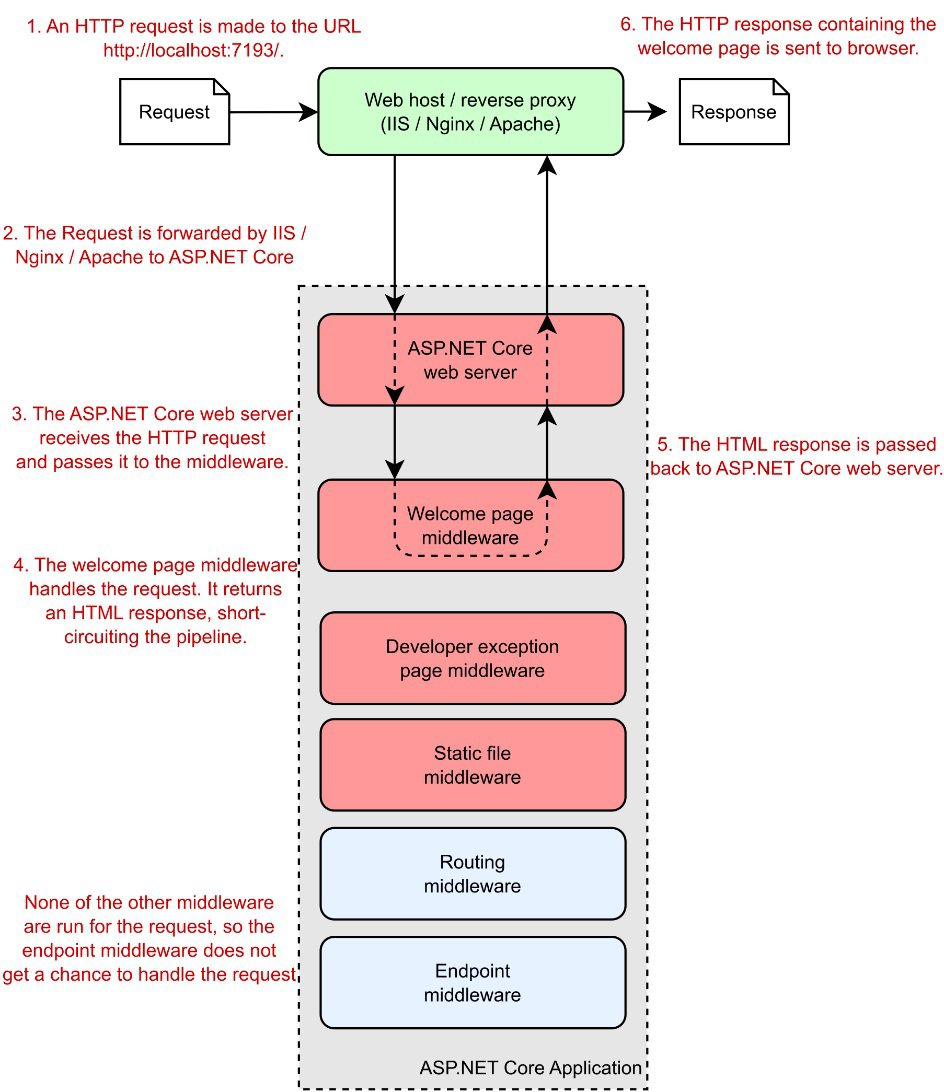

why `DeveloperExceptionPageMiddleware` at the start of pipeline?

### Handling errors using middleware

Errors are a fact of life when you’re developing applications. The **important thing** is that your application `handles these errors` gracefully, providing a s`uitable response` to the user and `not causing your whole application to fail`.

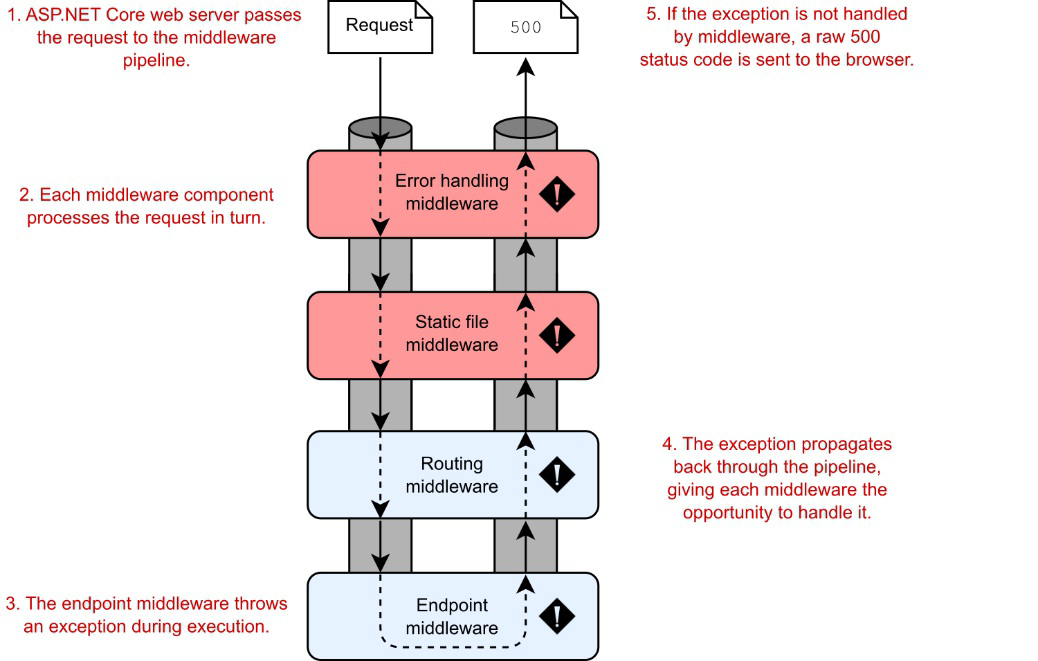

#### Viewing exceptions in development: DeveloperExceptionPage

In [ ]:
//WebApplication automatically adds this middleware to
//your middleware pipeline when you’re running in the Development
app.UseDeveloperExceptionPage();

When an `exception` is `thrown` and **propagates up the pipeline** to `this
middleware`, it’s captured. Then the middleware ***generates*** a `friendly HTML` page, which it returns with a 500 status code

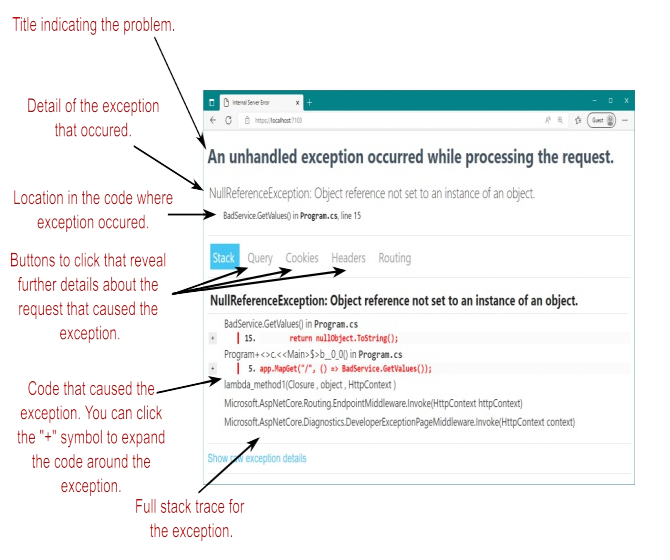

***Never use*** the `developer exception` page when running in `production`.

#### Handling exceptions in production: ExceptionHandlerMiddleware

you can show **custome exception** by using `ExceptionHandlerMiddleware`.

In [ ]:
using Microsoft.AspNetCore.Diagnostics;

var options = new WebApplicationOptions
{
    EnvironmentName = "Production"
};

var builder = WebApplication.CreateBuilder(options);
var app = builder.Build();

app.UseExceptionHandler("/error");

// تعریف مسیر خطا برای نمایش پیغام مناسب
app.Map("/error", (HttpContext httpContext) =>
{
    var exceptionHandlerPathFeature = httpContext.Features.Get<IExceptionHandlerPathFeature>();
    var exception = exceptionHandlerPathFeature?.Error;

    return Results.Problem(detail: "An error occurred while processing your request.",
                           statusCode: StatusCodes.Status500InternalServerError,
                           title: "Internal Server Error");
});

app.MapGet("/", (httpcontext) =>
    {
        throw new Exception("This is a test exception.");
    });

app.Run();

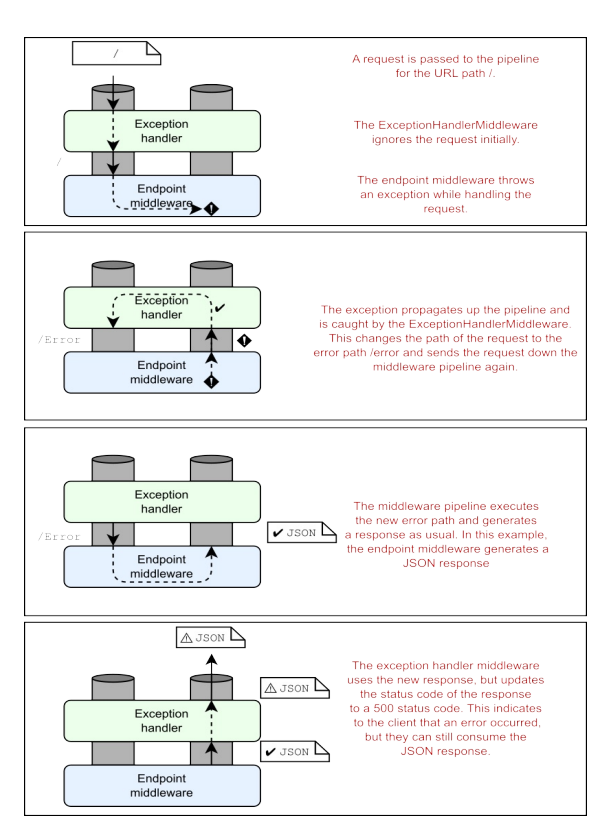

One of the main advantages of `reexecuting` the pipeline for `Razor Page apps`
is the ability to `have your error messages` integrated into your normal site
`layout`,